# Figures made for presentations
# Author: Sahar H. El Abbadi


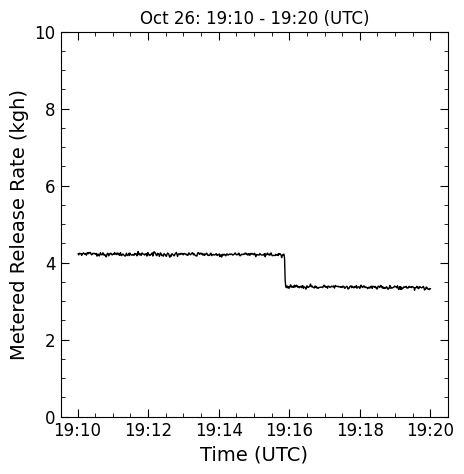

In [1]:
import pandas as pd
import pathlib
import datetime
from plot_methods import plot_selected_release_period

start_time = datetime.datetime(2022, 10, 26, 19, 10, 0)
end_time = datetime.datetime(2022, 10, 26, 19, 20, 0)
plot_selected_release_period(start_time, end_time)


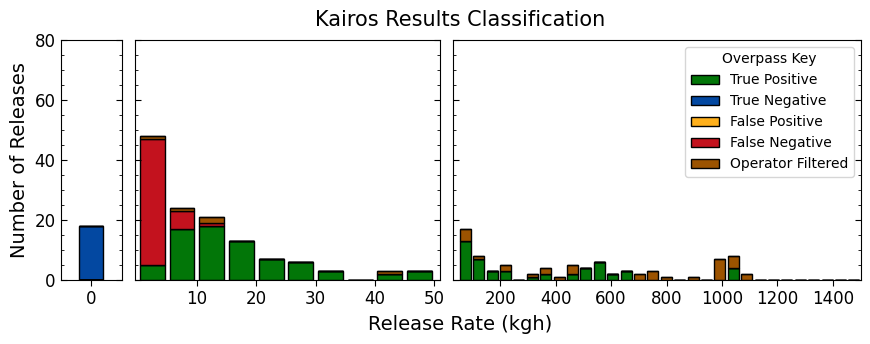

In [4]:
# Presentation Release Histogram

import pathlib
import datetime
import numpy as np
from methods_source import classify_histogram_data
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch
from methods_source import abbreviate_op_name


def make_releases_histogram(operator, stage, strict_discard=False, time_ave=60, gas_comp_source='km'):
    ############## Setup Data ##############

    # Create bins for middle histogram plot
    threshold_lower = 0
    threshold_upper = 50
    n_bins = 10
    op_histogram_low = classify_histogram_data(operator=operator, stage=stage,
                                               threshold_lower=threshold_lower, threshold_upper=threshold_upper,
                                               n_bins=n_bins,
                                               strict_discard=strict_discard, time_ave=time_ave,
                                               gas_comp_source=gas_comp_source)

    # Create bins for right histogram plot
    threshold_lower = 50
    threshold_upper = 1500
    n_bins = 30
    op_histogram_high = classify_histogram_data(operator=operator, stage=stage,
                                                threshold_lower=threshold_lower, threshold_upper=threshold_upper,
                                                n_bins=n_bins,
                                                strict_discard=strict_discard, time_ave=time_ave,
                                                gas_comp_source=gas_comp_source)

    ############## Figure ##############
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3,
                                        figsize=(10, 3),
                                        gridspec_kw={'width_ratios': [0.6, 3, 4]})

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.05,
                        hspace=0.05)

    # Determine max value for the y-axis
    low_height = op_histogram_low.bin_height.max()
    high_height = op_histogram_high.bin_height.max()
    y_height = max(low_height, high_height)
    y_height = math.ceil(y_height / 5) * 5

    # Ram's colors:
    seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
    #           0sangre,    1neptune,  2pumpkin,  3clover,  4denim,     5cocoa,     6cumin  7berry

    # Color scheme
    tp_color = seshadri[3]
    tn_color = seshadri[1]
    fp_color = seshadri[2]
    fn_color = seshadri[0]
    su_color = seshadri[4]
    op_color = seshadri[5]
    missing_color = seshadri[6]

    ####### Left histogram #######
    bar_width = 0.2
    # add true negatives
    ax1.bar(0, op_histogram_low.true_negative, width=bar_width, edgecolor='black', color=tn_color)

    # Zero release discarded by SU
    # su_filter_height0 = op_histogram_low.true_negative
    # ax1.bar(0, op_histogram_low.zero_filter_su, bottom=su_filter_height0, width=bar_width, label='Stanford Filtered',
    #         edgecolor='black', color=su_color)


    # Zero release discarded by operator
    op_filter_height0 = op_histogram_low.true_negative
    ax1.bar(0, op_histogram_low.zero_filter_op, bottom=op_filter_height0, width=bar_width, label='Operator Filtered',
            edgecolor='black', color=op_color)

    # Missing data zero release
    missing_height = np.add(op_filter_height0, op_histogram_low.zero_filter_op).tolist()
    ax1.bar(0, op_histogram_low.zero_missing, bottom=missing_height, width=bar_width, label='Operator Filtered',
            edgecolor='black', color=missing_color)

    # Add false positives
    false_positive_height = np.add(missing_height, op_histogram_low.zero_missing).tolist()
    ax1.bar(0, op_histogram_low.false_positive, bottom=false_positive_height, width=bar_width, label='Operator Filtered',
            edgecolor='black', color=fp_color)

    ####### Middle histogram #######
    bar_width = 4.2
    # Middle plot

    # Add True Positives
    ax2.bar(op_histogram_low.bin_median, op_histogram_low.true_positive, width=bar_width,
            label='True positive', edgecolor='black', color=tp_color)

    # Add False Positives
    ax2.bar(op_histogram_low.bin_median, op_histogram_low.false_positive, bottom=op_histogram_low.true_positive,
            width=bar_width, label='False positive', edgecolor='black', color=fp_color)

    # Add False Negatives
    fn_height = np.add(op_histogram_low.true_positive, op_histogram_low.false_positive).tolist()
    ax2.bar(op_histogram_low.bin_median, op_histogram_low.false_negative, bottom=op_histogram_low.true_positive,
            width=bar_width, label='False Negative', edgecolor='black', color=fn_color)

    # Add Stanford QC
    # su_filter_height = np.add(fn_height, op_histogram_low.false_negative).tolist()
    # ax2.bar(op_histogram_low.bin_median, op_histogram_low.filter_stanford, bottom=su_filter_height, width=bar_width,
    #         label='Stanford Filtered', edgecolor='black', color=su_color)
    # su_filter_height = 0

    # Add Carbon Mapper QC
    op_filter_height = np.add(fn_height, op_histogram_low.false_negative).tolist()
    ax2.bar(op_histogram_low.bin_median, op_histogram_low.filter_operator, bottom=op_filter_height, width=bar_width,
            label='Stanford Filtered', edgecolor='black', color=op_color)

    # Add missing data
    missing_height = np.add(op_filter_height, op_histogram_low.filter_operator).tolist()
    ax2.bar(op_histogram_low.bin_median, op_histogram_low.missing_data, bottom=missing_height, width=bar_width,
            label='Stanford Filtered', edgecolor='black', color=missing_color)

    ####### Right plot #######

    # reset bin width
    bar_width = 40
    # Add True Positives
    ax3.bar(op_histogram_high.bin_median, op_histogram_high.true_positive, width=bar_width, label='True positive',
            edgecolor='black', color=tp_color)

    # Add False Positives
    ax3.bar(op_histogram_high.bin_median, op_histogram_high.false_positive, bottom=op_histogram_high.true_positive,
            width=bar_width, label='False positive', edgecolor='black', color=fp_color)

    # Add False Negatives
    fn_height = np.add(op_histogram_high.true_positive, op_histogram_high.false_positive).tolist()
    ax3.bar(op_histogram_high.bin_median, op_histogram_high.false_negative, bottom=op_histogram_high.true_positive,
            width=bar_width, label='False Negative', edgecolor='black', color=fn_color)

    # Add Stanford QC
    # su_filter_height = np.add(fn_height, op_histogram_high.false_negative).tolist()
    # ax3.bar(op_histogram_high.bin_median, op_histogram_high.filter_stanford, bottom=su_filter_height, width=bar_width,
    #         label='Stanford Filtered', edgecolor='black', color=su_color)

    # Add Carbon Mapper QC
    op_filter_height = np.add(fn_height, op_histogram_high.false_negative).tolist()
    ax3.bar(op_histogram_high.bin_median, op_histogram_high.filter_operator, bottom=op_filter_height, width=bar_width,
            label='Stanford Filtered', edgecolor='black', color=op_color)

    # Add missing data
    missing_height = np.add(op_filter_height, op_histogram_high.filter_operator).tolist()
    ax3.bar(op_histogram_high.bin_median, op_histogram_high.missing_data, bottom=missing_height, width=bar_width,
            label='Stanford Filtered', edgecolor='black', color=missing_color)

    ############ Plot formatting ############
    # Set height of x and y axis limits
    # Left plot only shows zero
    ax1.set_ylim(bottom=0, top=y_height)
    ax1.set_xlim([-0.25, 0.25])

    # Middle plot shows >0 to 50 kgh
    ax2.set_ylim(bottom=0, top=y_height)
    ax2.set_xlim(left=-0.5, right=51)

    # Right plot shows 50 to 1500
    ax3.set_ylim(bottom=0, top=y_height)
    ax3.set_xlim(left=30, right=1500)

    # Common label for x-axis on all suplots
    txt_x_label = fig.text(0.5, -0.08, 'Release Rate (kgh)', ha='center', va='bottom', fontsize=14)

    # Plot title
    # remove stage for methane air
    txt_title = fig.text(0.5, 1, f'{operator} Results Classification', ha='center', va='top', fontsize=15)

    # Axes formatting and labels
    ax1.set_xticks([0])  # only have a tick at 0
    ax1.set_ylabel('Number of Releases', fontsize=14)
    ax1.tick_params(labelsize=12)
    ax1.minorticks_on()
    ax1.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)  # only label left & bottom axis
    ax1.tick_params(direction='in', which='major', axis='y', length=4, left=True, right=True)  # y-axis major
    # Turn off minor axis ticks for SciAv plot
    ax1.tick_params(direction='in', which='minor', length=2, left=True, right=True)  # y-axis minor
    ax1.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False)  # x-axis major

    # Format axes on middle plot
    ax2.tick_params(labelsize=12)
    ax2.minorticks_on()
    ax2.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False)  # only label bottom axis
    ax2.tick_params(direction='in', which='major', axis='y', length=4, left=True, right=True)  # y-axis major

    # Turn off minor axis ticks for SciAv plot
    ax2.tick_params(direction='in', which='minor', length=2, left=True, right=True)  # y-axis minor
    ax2.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False)  # x-axis major
    ax2.tick_params(which='minor', axis='x', bottom=False, top=False)
    x_ticks = ax2.xaxis.get_major_ticks()
    x_ticks[1].label1.set_visible(False)  # remove label on x=0
    x_ticks[1].set_visible(False)

    # Format axes on right plot
    ax3.tick_params(labelsize=12)
    ax3.minorticks_on()
    ax3.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False)  # only label on bottom
    ax3.tick_params(axis='y', which='major', direction='in', length=4, left=True, right=True)  # y-axis major
    # Turn off minor axis ticks for SciAv plot
    ax3.tick_params(axis='y', which='minor', direction='in', length=2, left=True, right=True)  # y-axis minor

    ax3.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False)  # x-axis major
    ax3.tick_params(which='minor', axis='x', bottom=False, top=False)

    # Set axes and background color to white
    ax1.set_facecolor('white')
    ax1.spines['top'].set_color('black')
    ax1.spines['left'].set_color('black')
    ax1.spines['right'].set_color('black')
    ax1.spines['bottom'].set_color('black')

    # Add legend

    histogram_legend = {
        'True Positive': tp_color,
        'True Negative': tn_color,
        'False Positive': fp_color,
        'False Negative': fn_color,
        # 'Stanford Filtered': su_color,
        'Operator Filtered': op_color, # remove operator filter for Methane AIR
        # 'Missing data': missing_color, # remove missing data for Kairos
    }

    legend_elements = [Patch(facecolor=v, edgecolor='black', label=k) for k, v in histogram_legend.items()]
    # lgd = ax3.legend(title='Overpass Key', handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    lgd = ax3.legend(title='Overpass Key', handles=legend_elements, loc='upper right')

    ############ Save Data ############

    op_ab = abbreviate_op_name(operator)
    now = datetime.datetime.now()
    save_time = now.strftime("%Y%m%d")

    # Save figure

    if strict_discard == True:
        discard = 'strict'
    else:
        discard = 'lax'

    fig_name = f'histogram_{op_ab}_{discard}_{save_time}'
    fig_path = pathlib.PurePath('04_figures', '00_presentation_figs', fig_name)
    plt.savefig(fig_path, bbox_extra_artists=(txt_x_label, txt_title, lgd), bbox_inches='tight')

    # # Save histogram low kgh inputs
    # table_name = f'histogram_low_{op_ab}_{save_time}.csv'
    # table_path = pathlib.PurePath('03_results', 'histogram', table_name)
    # op_histogram_low.to_csv(table_path)
    #
    # # Save histogram high kgh inputs
    # table_name = f'histogram_high_{op_ab}_{save_time}.csv'
    # table_path = pathlib.PurePath('03_results', 'histogram', table_name)
    # op_histogram_high.to_csv(table_path)

operator = 'Kairos'
stage = 1
strict_discard = False
time_ave= 60
gas_comp_source = 'km'
make_releases_histogram(operator=operator, stage=stage, strict_discard=strict_discard, time_ave=time_ave, gas_comp_source=gas_comp_source)

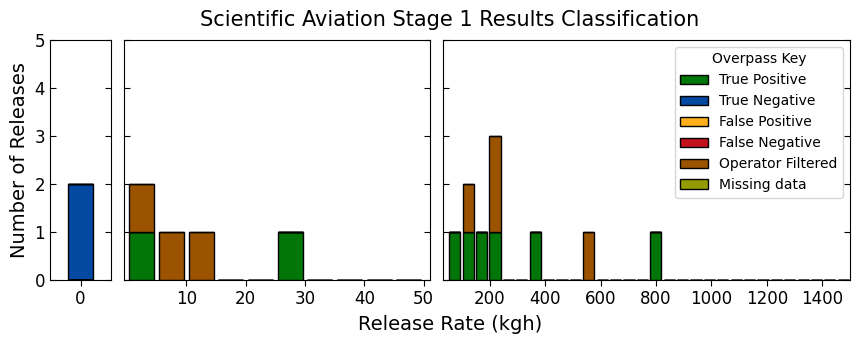

In [16]:
operator = 'Scientific Aviation'
stage = 1
strict_discard = True
time_ave= 60
gas_comp_source = 'km'
make_releases_histogram(operator=operator, stage=stage, strict_discard=strict_discard, time_ave=time_ave, gas_comp_source=gas_comp_source)

/Users/sea/PycharmProjects/CRF22_Airplanes/plot_methods.py:235: RuntimeWarning: invalid value encountered in scalar divide
  p = binned_data.operator_detected.sum() / binned_data.shape[0]  # df.shape[0] gives number of rows


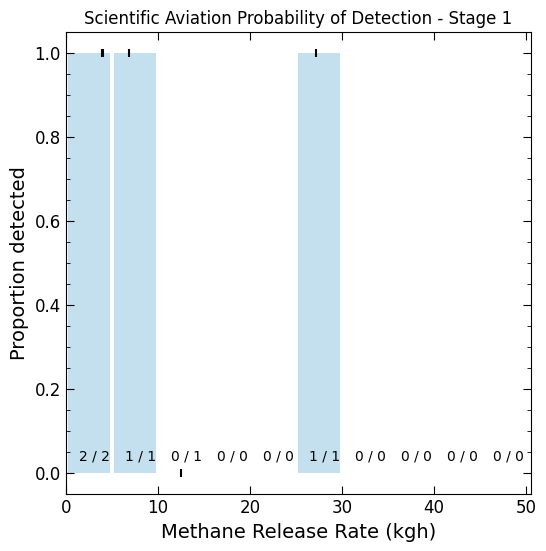

In [17]:
# Scientific Aviation
from plot_methods import plot_detection_limit
operator = 'Scientific Aviation'
stage = 1
strict_discard = False
time_ave = 60
gas_comp_source = 'km'
n_bins = 10
threshold = 50

plot_detection_limit(operator=operator, stage=stage, n_bins=n_bins,threshold=threshold, strict_discard=strict_discard, time_ave=time_ave, gas_comp_source=gas_comp_source)

   Unnamed: 0 operator  stage  total_overpasses  pass_stanford_qc  \
6           0   kairos      1               349               230   
7           0   kairos      2               349               230   
8           0   kairos      3               349               230   

   pass_operator_qc  pass_all_qc  fail_stanford_qc  fail_operator_qc  \
6               281          191               119                68   
7               281          191               119                68   
8               281          191               119                68   

   fail_all_qc  fail_stanford_only  fail_operator_only  
6           29                  90                  39  
7           29                  90                  39  
8           29                  90                  39  


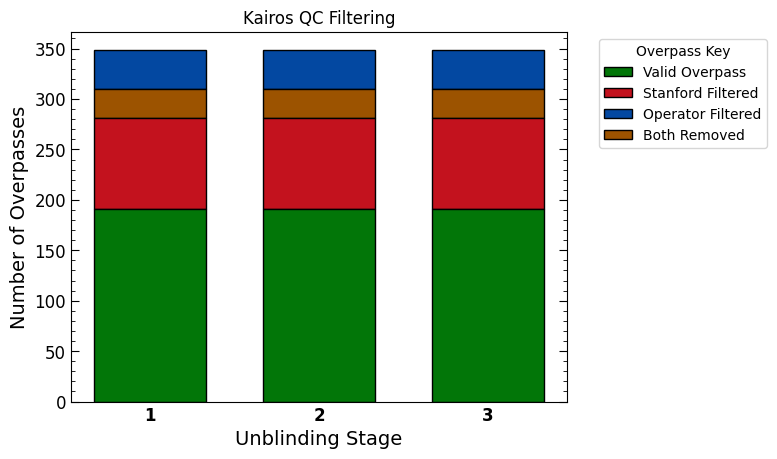

In [5]:
# Make QC for one operator at all stages

import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from methods_source import abbreviate_op_name

operator = 'Kairos'
all_qc = pd.read_csv(pathlib.PurePath('03_results', 'qc_comparison', 'all_qc.csv'))
op_ab = abbreviate_op_name(operator)
op_qc = all_qc.loc[all_qc['operator'] == op_ab]
print(op_qc)


category = ['fail_stanford_only', 'fail_all_qc', 'fail_operator_only']
stages = [1, 2, 3]
n_stages = 3  # number of operators

# Determine values for each group, alphabetical order of operators: "Carbon Mapper, GHGSat, Kairos"

fail_operator = np.zeros(n_stages)
fail_stanford = np.zeros(n_stages)
fail_all = np.zeros(n_stages)
pass_all = np.zeros(n_stages)

# Height of bars

for i in range(len(stages)):  # for go through fail stanford only
    operator_stage_qc = op_qc.loc[op_qc.stage == (i+1)]
    fail_operator[i] = operator_stage_qc.fail_operator_only
    fail_stanford[i] = operator_stage_qc.fail_stanford_only
    fail_all[i] = operator_stage_qc.fail_all_qc
    pass_all[i] = operator_stage_qc.pass_all_qc

barWidth = 1
# Set height of all sets of bars
# Height of stanford_fail is height of pass_all
# Height of fail_all is height of fail_stanford and pass_all
all_fail_height = np.add(fail_stanford, pass_all).tolist()
# height of fail_operator + fail_all
operator_height = np.add(all_fail_height, fail_all).tolist()

# Set color scheme
pass_color = '#027608'
fail_op_color = '#0348a1'
fail_stanford_color = '#c3121e'
fail_both_color = '#9c5300'

# pass_color = '#87C27E'
# fail_op_color = '#FCEFA9'
# fail_stanford_color = '#B9B5D6'
# fail_both_color = '#B8ADAA'

# The position of the bars on the x-axis
r = np.linspace(0, 3, 3)

# Bars for fail operator QC (on top of failing Stanford and both)
plt.bar(r, fail_operator, bottom=operator_height, color=fail_op_color, edgecolor='black', width=barWidth,
        label='Removed by Operator QC')
# Create bars for failing both QC criteria
plt.bar(r, fail_all, bottom=all_fail_height, color=fail_both_color, edgecolor='black', width=barWidth,
        label="Removed by Both QC")
# Create failing Stanford QC only
plt.bar(r, fail_stanford, bottom=pass_all, color=fail_stanford_color, edgecolor='black', width=barWidth,
        label="Removed by Stanford QC")
# Creat bars for passing all QC
plt.bar(r, pass_all, color=pass_color, edgecolor='black', width=barWidth, label='Passed all QC')

# Custom X axis
plt.xticks(r, stages, fontweight='bold')
plt.xlabel("Unblinding Stage", fontsize=14)
plt.ylabel("Number of Overpasses", fontsize=14)
plt.title(f"{operator} QC Filtering")
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=True, right=True)
plt.tick_params(direction='in', which='major', length=6, bottom=False, top=False, left=True, right=True)

overpass_colors = {'pass_all': pass_color,
                   'fail_stanford': fail_stanford_color,
                   'fail_operator': fail_op_color,
                   'fail_all': fail_both_color,
                   }

overpass_legend = {'Valid Overpass': pass_color,
                   'Stanford Filtered': fail_stanford_color,
                   'Operator Filtered': fail_op_color,
                   'Both Removed': fail_both_color,
                   }


handles = [
    Patch(facecolor=v, edgecolor='black', label=k) for
    k, v in
    overpass_legend.items()]
lgd = plt.legend(title='Overpass Key', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

save_path = pathlib.PurePath('04_figures', '00_presentation_figs', f'{op_ab}_stages')
plt.savefig(save_path, bbox_extra_artists=(lgd,), bbox_inches='tight', transparent=True)

     release_rate  release_sigma  operator_report  operator_sigma
2       18.748945       0.063237         25.85856         0.00000
3       18.719447       0.058918         20.04708         2.47260
4       18.739307       0.061051         27.09712         3.65968
11      12.910035       0.047069         10.79068         0.71484
12      12.934993       0.046286         19.50864         1.07264
..            ...            ...              ...             ...
325      7.567531       0.024246          7.68384         0.79488
327     58.619486       0.134186         86.32728         2.91928
333     51.592804       0.122959         66.01992         0.13320
336     49.240484       0.116601         68.33504         1.77568
343      9.411912       0.089645         10.63328         2.99768

[87 rows x 4 columns]


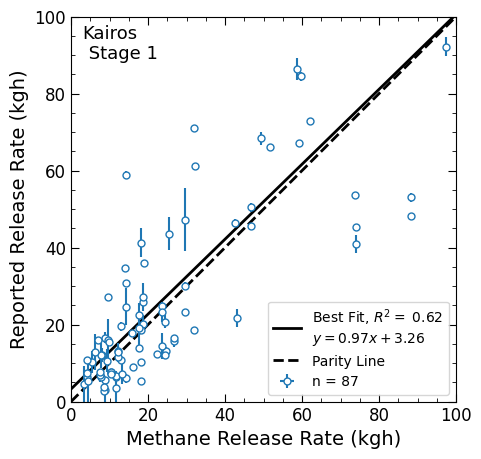

In [20]:
from plot_methods import make_parity_plot, get_parity_data
kairos_1_data, kairos_1_notes = get_parity_data('Kairos', stage=1)

max_release = 100
kairos_1_data = kairos_1_data.loc[kairos_1_data.release_rate <= max_release].copy()
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
make_parity_plot(kairos_1_data, kairos_1_notes, ax, plot_lim=[0, max_release])
save_path = pathlib.PurePath('04_figures', '00_presentation_figs', f'kairos_zoom_100kgh')
plt.savefig(save_path)

print(kairos_1_data)

<Axes: xlabel='Methane Release Rate (kgh)', ylabel='Reported Release Rate (kgh)'>

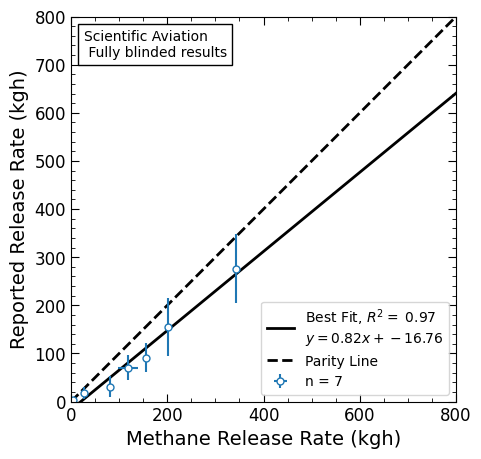

In [2]:
import matplotlib.pyplot as plt
from plot_methods import make_parity_plot, get_parity_data
sciav_data, sciav_notes = get_parity_data('Scientific Aviation', stage=1)

max_release = 800
sciav_data = sciav_data.loc[sciav_data.release_rate <= max_release].copy()
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
make_parity_plot(sciav_data, sciav_notes, ax, plot_lim=[0, max_release])